# 银行客户贷款违约预测

<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
这里是利用IBM DSX来对银行客户贷款的数据集进行建模预测未来违约的可能性。
</p>
<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
这个文档包括了从数据加载、数据理解、数据处理准备、建模、模型部署与API测试。
</p>

## 1. 加载数据

<p style="text-indent: 0em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
从github下载数据文件，可以采用2种方式(二选一，不同时运行)：
</p>
<ol>
    <li>下载<a href="https://raw.githubusercontent.com/dongpo2/datascience/master/loanDefault/bankloan.csv" target="_blank">数据文件</a>到本地，然后直接从本地装载文件到DSX</li>
        <ul><li> URL:<a href="https://raw.githubusercontent.com/dongpo2/datascience/master/loanDefault/bankloan.csv" target="_blank">https://raw.githubusercontent.com/dongpo2/datascience/master/loanDefault/bankloan.csv</a></li></ul>
    <li>或者，使用wget直接从github下载到DSX，然后保存到cloud-object-storage</li>
</ol>


### 1.1a 直接下载文件，并导入DSX

<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
下载文件，保存到本地，文件名称如：bankloan.csv。然后，点击右上角"Data"图标，在右侧的Files栏加入bankloan.csv文件
</p>

### 1.1b 使用wget下载文件并保存到DSX
<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
如果第一次运行，请安装wget程序包；如果已经安装，请略过，或注释掉下面代码。
</p>

In [5]:
!pip install --user wget

  Using cached wget-3.2.zip
  Running setup.py bdist_wheel for wget ... done
  Stored in directory: /gpfs/fs01/user/s206-67b383ca00dcf3-efce55bf60d1/.cache/pip/wheels/6d/98/29/61ccc41148f871009126c2e844e26f73eeb25e12cca92228a5
Successfully built wget


<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
使用wget下载文件到本地，文件名：bankloan.csv。
</p>

In [1]:
import os
import wget

if os.path.isfile("bankloan.csv"):
    filename = "bankloan.csv"
else:
    link_to_data = 'https://raw.githubusercontent.com/dongpo2/datascience/master/loanDefault/bankloan.csv'
    filename = wget.download(link_to_data)
print(filename)

bankloan.csv


<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
<strong>赋值服务的相关变量：</strong>
</p>
<ul>
    <li>BUCKET="" # 右上角用户图标->setting，点击"Apps and Services"，选择cloud-object-storage-xx，选择管理，点击buckets，复制项目相应存储区名称到左侧</li>
    <li>IBM_API_KEY_ID=""  # 点击"服务凭证"，找到对应WDP-Editor-<BUCKET>，点击查看凭证，复制"apikey"后面值到左侧</li>
    <li>ENDPOINT_URL="" # 复制"endpoints"后面值到左侧</li>
</ul>
<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
<strong> 注：如果使用第一种方式，不执行下面cell</strong>
</p>

In [2]:
# The code was removed by DSX for sharing.

<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
定义与存储的访问接口函数client_manual
</p>
<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
<strong> 注：如果使用第一种方式，不执行下面cell</strong>
</p>

In [3]:
import sys
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

client_manual = ibm_boto3.client(service_name='s3',
    ibm_api_key_id=IBM_API_KEY_ID,
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=ENDPOINT_URL)


<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
上传下载的文件到cloud-object-storage
</p>
<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
<strong> 注：如果使用第一种方式，不执行下面cell</strong>
</p>

In [4]:
body2 = client_manual.upload_file(filename, Bucket=BUCKET,Key='bankloan.csv')

### 1.2 导入数据集
<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
把焦点放到下侧cell，点击右上角"Data"图标，在右下侧选择bankloan.csv的"Insert to code"中"Insert SparkSession DataFrame"
</p>
<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
<strong>注：如果采用1.1b程序下载并导入方式，请重新刷新本项目，并将文件加入数据集，才能看到该文件</strong>
</p>

In [6]:
# The code was removed by DSX for sharing.

[Row(age='41', ed='3', employ='17', address='12', income='176.000', debtinc='9.300', creddebt='11.359', othdebt='5.009', default='1'),
 Row(age='27', ed='1', employ='10', address='6', income='31.000', debtinc='17.300', creddebt='1.362', othdebt='4.001', default='0'),
 Row(age='40', ed='1', employ='15', address='14', income='55.000', debtinc='5.500', creddebt='0.856', othdebt='2.169', default='0'),
 Row(age='41', ed='1', employ='15', address='14', income='120.000', debtinc='2.900', creddebt='2.659', othdebt='0.821', default='0'),
 Row(age='24', ed='2', employ='2', address='0', income='28.000', debtinc='17.300', creddebt='1.787', othdebt='3.057', default='1')]

<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
修改DataFrame名字
</p>


In [8]:
df_loan = df_data_5

## 2. 理解数据

<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
建模，首先要理解数据各个特征的业务含义和具体分布、质量等情况。这里，简单对数据集进行操作和探究数据特点。
</p>
<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
在这个阶段，除了参与建模的业务分析师和数据科学家理解数据，数据工程师也会对数据进行处理，形成最终高质量符合要求的数据集。
</p>
<ol>
    <li>age: 客户年龄</li>
    <li>ed: 教育程度(1,2,3...)</li>
    <li>employ: 工作年限</li>
    <li>address: 此地址居住年限</li>
    <li>income: 客户年收入(单位千美元)</li>
    <li>debtinc: 负债收入比例(%)</li>
    <li>creddebt: 信用卡负债收入比例(%)</li>
    <li>othdebt: 其它负债收入比例(%)</li>
    <li>default: 是否违约(1-是，0-否)</li>
</ol>

### 2.1 数据基本情况分析
<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
数据格式显示
</p>


In [9]:
df_loan.printSchema()

root
 |-- age: string (nullable = true)
 |-- ed: string (nullable = true)
 |-- employ: string (nullable = true)
 |-- address: string (nullable = true)
 |-- income: string (nullable = true)
 |-- debtinc: string (nullable = true)
 |-- creddebt: string (nullable = true)
 |-- othdebt: string (nullable = true)
 |-- default: string (nullable = true)



<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
显示数据的内容，大致直观理解数据字段(特征)的类型及实际情况。
</p>

In [11]:
df_loan.show()

+---+---+------+-------+-------+-------+--------+-------+-------+
|age| ed|employ|address| income|debtinc|creddebt|othdebt|default|
+---+---+------+-------+-------+-------+--------+-------+-------+
| 41|  3|    17|     12|176.000|  9.300|  11.359|  5.009|      1|
| 27|  1|    10|      6| 31.000| 17.300|   1.362|  4.001|      0|
| 40|  1|    15|     14| 55.000|  5.500|   0.856|  2.169|      0|
| 41|  1|    15|     14|120.000|  2.900|   2.659|  0.821|      0|
| 24|  2|     2|      0| 28.000| 17.300|   1.787|  3.057|      1|
| 41|  2|     5|      5| 25.000| 10.200|   0.393|  2.157|      0|
| 39|  1|    20|      9| 67.000| 30.600|   3.834| 16.668|      0|
| 43|  1|    12|     11| 38.000|  3.600|   0.129|  1.239|      0|
| 24|  1|     3|      4| 19.000| 24.400|   1.358|  3.278|      1|
| 36|  1|     0|     13| 25.000| 19.700|   2.778|  2.147|      0|
| 27|  1|     0|      1| 16.000|  1.700|   0.183|  0.089|      0|
| 25|  1|     4|      0| 23.000|  5.200|   0.252|  0.944|      0|
| 52|  1| 

<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
计算数据集记录数。
</p>


In [12]:
df_loan.count()

850

<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
查看标注情况，违约标注是否有异常值。
</p>


In [13]:
df_loan.where((df_loan['default'] != '1') & (df_loan['default'] != '0')).show()

+---+---+------+-------+-------+-------+--------+-------+-------+
|age| ed|employ|address| income|debtinc|creddebt|othdebt|default|
+---+---+------+-------+-------+-------+--------+-------+-------+
| 36|  1|    16|     13| 32.000| 10.900|   0.544|  2.944| $null$|
| 50|  1|     6|     27| 21.000| 12.900|   1.317|  1.392| $null$|
| 40|  1|     9|      9| 33.000| 17.000|   4.881|  0.729| $null$|
| 31|  1|     5|      7| 23.000|  2.000|   0.046|  0.414| $null$|
| 29|  1|     4|      0| 24.000|  7.800|   0.867|  1.005| $null$|
| 25|  2|     1|      3| 14.000|  9.900|   0.233|  1.153| $null$|
| 34|  1|     4|      3| 28.000|  9.400|   1.058|  1.574| $null$|
| 50|  1|    30|      8|150.000| 32.500|  13.553| 35.197| $null$|
| 27|  1|     5|      5| 26.000|  1.200|   0.130|  0.182| $null$|
| 31|  4|     7|     12| 97.000|  6.000|   1.827|  3.993| $null$|
| 45|  1|     8|     25| 27.000|  2.600|   0.416|  0.286| $null$|
| 35|  1|    10|      8| 28.000|  1.300|   0.110|  0.254| $null$|
| 47|  2| 

<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
数据集有数据没有标注，这部分数据无法进行训练和验证，因此会去处。简单计算此记录数量。
</p>


In [14]:
df_loan.where((df_loan['default'] != '1') & (df_loan['default'] != '0')).count()

150

<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
把有标注的数据重新定义一个数据集，以进行更多操作。
</p>


In [15]:
df_loan_labeled = df_loan.where((df_loan['default'] == '1') | (df_loan['default'] == '0'))

In [16]:
df_loan_labeled.show(5)

+---+---+------+-------+-------+-------+--------+-------+-------+
|age| ed|employ|address| income|debtinc|creddebt|othdebt|default|
+---+---+------+-------+-------+-------+--------+-------+-------+
| 41|  3|    17|     12|176.000|  9.300|  11.359|  5.009|      1|
| 27|  1|    10|      6| 31.000| 17.300|   1.362|  4.001|      0|
| 40|  1|    15|     14| 55.000|  5.500|   0.856|  2.169|      0|
| 41|  1|    15|     14|120.000|  2.900|   2.659|  0.821|      0|
| 24|  2|     2|      0| 28.000| 17.300|   1.787|  3.057|      1|
+---+---+------+-------+-------+-------+--------+-------+-------+
only showing top 5 rows



In [17]:
df_loan_labeled.count()

700

<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
由于数据集读入后全部作为字符串，因此需要转换为相应类型。有多种转换方法，这里采用通过panda的sastype功能。
</p>


In [18]:
df_pd = df_loan_labeled.toPandas().astype({'age':'int', 
                                            'ed':'int', 
                                           'employ': 'int', 
                                           'address': 'int', 
                                           'income': 'float', 
                                           'debtinc': 'float', 
                                           'creddebt': 'float', 
                                           'othdebt': 'float', 
                                           'default': 'int' 
                                        })

### 2.2 数据集统计信息分析
<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
展现数据集的统计信息，使用pandas dataframe的统计函数，此函数与spark统计函数有一定差异。
</p>


In [19]:
df_pd.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,34.860000,1.722857,8.388571,8.278571,45.601429,10.260571,1.553569,3.058196,0.261429
std,7.997342,0.928206,6.658039,6.824877,36.814226,6.827234,2.117195,3.287548,0.439727
min,20.000000,1.000000,0.000000,0.000000,14.000000,0.400000,0.012000,0.046000,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.000000,0.368750,1.044000,0.000000
50%,34.000000,1.000000,7.000000,7.000000,34.000000,8.600000,0.855000,1.987500,0.000000
75%,40.000000,2.000000,12.000000,12.000000,55.000000,14.125000,1.901750,3.923250,1.000000
max,56.000000,5.000000,31.000000,34.000000,446.000000,41.300000,20.561000,27.034000,1.000000


<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
为了便于操作，再次转换为spark DataFrame。
</p>


In [20]:
sparkDF = spark.createDataFrame(df_pd)

<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
可以与上面pandas的统计函数对照，spark统计结果缺少中位数、四分位数等指标。
</p>


In [22]:
sparkDF.describe().show(truncate=10)

+-------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
|summary|       age|        ed|    employ|   address|    income|   debtinc|  creddebt|   othdebt|   default|
+-------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
|  count|       700|       700|       700|       700|       700|       700|       700|       700|       700|
|   mean|     34.86|1.72285...|8.38857...|8.27857...|45.6014...|10.2605...|1.55356...|3.05819...|0.26142...|
| stddev|7.99734...|0.92820...|6.65803...|6.82487...|36.8142...|6.82723...|2.11719...|3.28754...|0.43972...|
|    min|        20|         1|         0|         0|      14.0|       0.4|     0.012|     0.046|         0|
|    max|        56|         5|        31|        34|     446.0|      41.3|    20.561|    27.034|         1|
+-------+----------+----------+----------+----------+----------+----------+----------+----------+----------+



<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
理解数据分布后，对目标的关联性也可以进行观察，使用各特征与标注的相关系数帮助理解其业务关联性。从而确定是否选择作为建模特征。
</p>


In [23]:
cols = sparkDF.columns
for col in cols:
    if col != 'default':
        print("Correlation between ", col ,"\tand default: ",sparkDF.corr(col, 'default'))
        

Correlation between  age 	and default:  -0.1376571021137141
Correlation between  ed 	and default:  0.11467555101615441
Correlation between  employ 	and default:  -0.28297839296551097
Correlation between  address 	and default:  -0.16445115872803867
Correlation between  income 	and default:  -0.07096965661922316
Correlation between  debtinc 	and default:  0.3895747597177062
Correlation between  creddebt 	and default:  0.24473355926616536
Correlation between  othdebt 	and default:  0.14571646915013933


### 2.3 图形化分析数据
<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
使用图形能够帮助更好地理解数据，表达数据间关系。这里使用直方图来理解在违约人群中和非违约人群中的分布情况。
</p>


In [24]:
from matplotlib import pyplot as plt

x = sparkDF.filter(sparkDF['default'] == '0').select('age').rdd.map(lambda x: x[0]).collect()
y = sparkDF.filter(sparkDF['default'] == '1').select('age').rdd.map(lambda x: x[0]).collect()

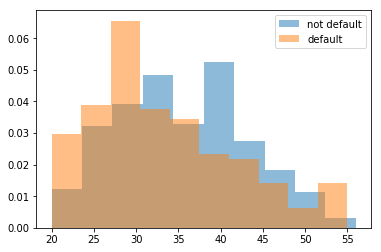

In [25]:
plt.hist(x, bins=10, normed=True, alpha=0.5, label='not default')
plt.hist(y, bins=10, normed=True, alpha=0.5, label='default')
plt.legend(loc='upper right')
plt.show()

<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
以上图形，大概可以看出违约人群中年轻人更多，而非违约人群贷款较为合理，中年人居多。
</p>
<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
进一步，在不同年龄段也大致可以看出小于30岁年轻人的违约概率高于非违约概率。另外在54、55岁左右违约的概率再次超过非违约概率。
</p>


<strong>动手实践环节：
图形展现在违约与不违约情况下负债收入比的直方图(概率密度)，并理解负债收入与违约的关系
</strong>

### 2.4 使用SQL语句分析数据集

In [26]:
sparkDF.createOrReplaceTempView("bankloan")

In [27]:
spark.sql("select default, count(income) from bankloan group by default").show()

+-------+-------------+
|default|count(income)|
+-------+-------------+
|      0|          517|
|      1|          183|
+-------+-------------+



In [28]:
spark.sql("select default, count(income) from bankloan where income > 55 group by default").show()

+-------+-------------+
|default|count(income)|
+-------+-------------+
|      0|          140|
|      1|           32|
+-------+-------------+



In [29]:
spark.sql("select * from bankloan where income > 55").describe().show(truncate=10)

+-------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
|summary|       age|        ed|    employ|   address|    income|   debtinc|  creddebt|   othdebt|   default|
+-------+----------+----------+----------+----------+----------+----------+----------+----------+----------+
|  count|       172|       172|       172|       172|       172|       172|       172|       172|       172|
|   mean|41.1279...|       2.0|15.1802...|11.5523...|91.9825...|10.5063...|3.24314...|6.01431...|0.18604...|
| stddev|6.62230...|1.01451...|6.62416...|7.67868...|48.2277...|7.09821...|3.35091...|4.76842...|0.39028...|
|    min|        27|         1|         0|         0|      56.0|       0.4|     0.159|     0.188|         0|
|    max|        56|         5|        31|        34|     446.0|      41.3|    20.561|    27.034|         1|
+-------+----------+----------+----------+----------+----------+----------+----------+----------+----------+



### 2.5 完成数据准备，保存为数据集，供建模人员使用

<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
保存为一个数据文件，供下一阶段或者共享给其他人使用。
</p>
<strong>注意：接口操作函数，修改为相应的名称</strong>

In [30]:
import io

csvString = sparkDF.toPandas().to_csv(index=None)
body2 = client_manual.upload_fileobj(io.BytesIO(csvString.encode()), Bucket=BUCKET,Key='bankloan_edit.csv')

## 3. 建模阶段

In [31]:
from pyspark.sql.types import *
sm = StructType([
    StructField("age", IntegerType(), True),
    StructField("ed", IntegerType(), True),
    StructField("employ", IntegerType(), True),
    StructField("address", IntegerType(), True),
    StructField("income", FloatType(), True),
    StructField("debtinc", FloatType(), True),
    StructField("creddebt", FloatType(), True),
    StructField("othdebt", FloatType(), True),
    StructField("default", IntegerType(), True)])

### 3.1 读入准备好的数据集
<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
参考上面1.2步骤，重新刷新项目，并把新保存的文件bankloan_edit.csv加为数据集，然后在右侧"Data"图标下选择该文件"Insert to code"下的"Insert SparkSession DataFrame"
</p>
<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
<strong>修改程序中读入格式，从而避免转换数据格式：spark.read -&gt; spark.read.schema(sm)</strong>
</p>

In [32]:

df_data_6 = spark.read.schema(sm)\
  .format('org.apache.spark.sql.execution.datasources.csv.CSVFileFormat')\
  .option('header', 'true')\
  .load(cos.url('bankloan_edit.csv', 'demos576f9d90364f446a9715e083788b0f67'))
df_data_6.take(5)


[Row(age=41, ed=3, employ=17, address=12, income=176.0, debtinc=9.300000190734863, creddebt=11.359000205993652, othdebt=5.008999824523926, default=1),
 Row(age=27, ed=1, employ=10, address=6, income=31.0, debtinc=17.299999237060547, creddebt=1.3619999885559082, othdebt=4.000999927520752, default=0),
 Row(age=40, ed=1, employ=15, address=14, income=55.0, debtinc=5.5, creddebt=0.8560000061988831, othdebt=2.1689999103546143, default=0),
 Row(age=41, ed=1, employ=15, address=14, income=120.0, debtinc=2.9000000953674316, creddebt=2.6589999198913574, othdebt=0.8209999799728394, default=0),
 Row(age=24, ed=2, employ=2, address=0, income=28.0, debtinc=17.299999237060547, creddebt=1.7869999408721924, othdebt=3.056999921798706, default=1)]

<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
修改正确的数据集名称
</p>

In [33]:
df_data = df_data_6
df_data.printSchema()

root
 |-- age: integer (nullable = true)
 |-- ed: integer (nullable = true)
 |-- employ: integer (nullable = true)
 |-- address: integer (nullable = true)
 |-- income: float (nullable = true)
 |-- debtinc: float (nullable = true)
 |-- creddebt: float (nullable = true)
 |-- othdebt: float (nullable = true)
 |-- default: integer (nullable = true)



### 3.2 对输入特征进行组装

In [34]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(
    inputCols=["age", "ed", "employ", "address", "income", "debtinc", "creddebt", "othdebt"],
    outputCol="features")

output = assembler.transform(df_data)
output.select("features", "default").show(5)

+--------------------+-------+
|            features|default|
+--------------------+-------+
|[41.0,3.0,17.0,12...|      1|
|[27.0,1.0,10.0,6....|      0|
|[40.0,1.0,15.0,14...|      0|
|[41.0,1.0,15.0,14...|      0|
|[24.0,2.0,2.0,0.0...|      1|
+--------------------+-------+
only showing top 5 rows



### 3.3 使用随机森林算法

In [38]:
from pyspark.ml.classification import RandomForestClassifier

rf = RandomForestClassifier(numTrees=20, maxDepth=5, labelCol="default", seed=207336481)
#rf_model = rf.fit(train_data)

### 3.4 把输出预测结果转换为文字

In [39]:
from pyspark.ml.feature import IndexToString
from pyspark.ml import Model, Pipeline
labelConverter = IndexToString(inputCol="prediction", 
                               outputCol="predictedLabel", labels=['not default', 'default'])

### 3.5 使用Spark pipeline组装

In [40]:
pipeline_rf = Pipeline(stages=[assembler, rf, labelConverter])

### 3.6 把数据集分拆为训练集和测试集

In [41]:
splitted_data = df_data.randomSplit([0.8, 0.20], 24)
train_data = splitted_data[0]
test_data = splitted_data[1]
#predict_data = splitted_data[2]

print("Number of training records: " + str(train_data.count()))
print("Number of testing records : " + str(test_data.count()))

Number of training records: 557
Number of testing records : 143


### 3.7 训练模型

In [42]:
model_rf = pipeline_rf.fit(train_data)

### 3.8 使用测试集验证并计算模型指标

In [43]:
rf_tr = model_rf.transform(test_data)
scoreAndLabels = rf_tr.rdd.map(lambda x: [float(x.probability[1]), float(x.default)]).collect()

#### 3.8.1 使用AUC等指标

In [46]:
from  pyspark.mllib.evaluation import BinaryClassificationMetrics

metrics = BinaryClassificationMetrics(scoreAndLabels)
print("areaUnderROC: " + str(metrics.areaUnderROC))
print("areaUnderPR: " + str(metrics.areaUnderPR))

areaUnderROC: 0.8704742478327385
areaUnderPR: 0.6318013546681596


#### 3.8.2 计算准确率、精准率、召回率等指标

In [47]:
from  pyspark.mllib.evaluation import MulticlassMetrics

predictionAndLabels = rf_tr.rdd.map(lambda x: [float(x.prediction), float(x.default)]).collect()
predictionAndLabels = sc.parallelize(predictionAndLabels)
mmetrics = MulticlassMetrics(predictionAndLabels)
print("Accuracy: ", mmetrics.accuracy)
print("Precision for default: ", mmetrics.precision(1.0))
print("Recall for default: ", mmetrics.recall(1.0))
print("Precision for not default: ", mmetrics.precision(0.0))
print("Recall for not default: ", mmetrics.recall(0.0))
print("TruePositiveRate for default: ", mmetrics.truePositiveRate(1.0))
print("FalsePositiveRate for default: ", mmetrics.falsePositiveRate(1.0))
print("TruePositiveRate for not default: ", mmetrics.truePositiveRate(0.0))
print("FalsePositiveRate for not default: ", mmetrics.falsePositiveRate(0.0))

Accuracy:  0.7972027972027972
Precision for default:  0.75
Recall for default:  0.32432432432432434
Precision for not default:  0.8031496062992126
Recall for not default:  0.9622641509433962
TruePositiveRate for default:  0.32432432432432434
FalsePositiveRate for default:  0.03773584905660377
TruePositiveRate for not default:  0.9622641509433962
FalsePositiveRate for not default:  0.6756756756756757


In [52]:
mmetrics.confusionMatrix()

DenseMatrix(2, 2, [102.0, 25.0, 4.0, 12.0], 0)

In [ ]:
rf_model = model_rf.stages[1]

In [53]:
for i in range(len(rf_model.featureImportances)):
    print(cols[i], "\t: ", rf_model.featureImportances[i])

age 	:  0.0851345292062
ed 	:  0.0201493315137
employ 	:  0.286717009857
address 	:  0.0918278816717
income 	:  0.0820203985836
debtinc 	:  0.193316664148
creddebt 	:  0.165632607628
othdebt 	:  0.0752015773911


#### 3.8.3 另一种指标计算方法

In [48]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

predictions = rf_tr
evaluatorRF = MulticlassClassificationEvaluator(labelCol="default", predictionCol="prediction", metricName="accuracy")
accuracy = evaluatorRF.evaluate(predictions)
print("Accuracy = %g" % accuracy)
print("Test Error = %g" % (1.0 - accuracy))

Accuracy = 0.797203
Test Error = 0.202797


### 3.9 图形化展现ROC

In [49]:
prob = rf_tr.select("probability").rdd.map(lambda x: x[0][1]).collect()
lab = rf_tr.select('default').rdd.map(lambda x: x[0]).collect()

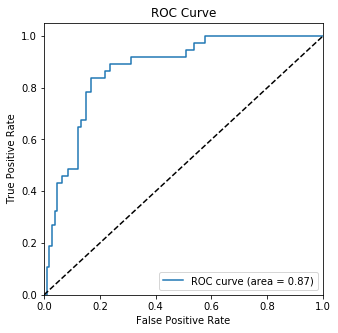

In [50]:
%matplotlib inline
from sklearn.metrics import roc_curve,auc

#prob = rf_tr["probability"] 
fpr, tpr, thresholds = roc_curve(lab, prob, pos_label=1);
roc_auc = auc(fpr, tpr)

# PLOT ROC CURVE
plt.figure(figsize=(5,5))
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

## 4. 保存模型

In [51]:
from repository.mlrepositoryclient import MLRepositoryClient
from repository.mlrepositoryartifact import MLRepositoryArtifact

/usr/local/src/conda3_runtime/home/envs/DSX-Python35-Spark/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
<strong>赋值服务的相关变量：</strong>
</p>
<ul>
    <li>url= ""  # 右上角用户图标->setting，点击"Apps and Services"，选择Machine Learning-xx，选择服务凭证，查看凭证，复制url值到左侧
    <li>username="" # 复制username值到左侧</li>
    <li>password=""  # 复制"password"后面值到左侧</li>
    <li>instance_id="" # 复制"instance_id"后面值到左侧</li>
</ul>


In [54]:
# The code was removed by DSX for sharing.

In [55]:
ml_repository_client = MLRepositoryClient(url)
ml_repository_client.authorize(username, password)

<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
<strong>可以修改保存的模型名字，如"Artifact Model" -&gt; "&lt;your name&gt; Model"</strong>
</p>


In [56]:
from repository.mlrepository.meta_props import MetaProps
from repository.mlrepository.meta_names import MetaNames
model_artifact = MLRepositoryArtifact(model_rf, training_data=train_data, name="Artifact Model", meta_props=MetaProps({
     MetaNames.LABEL_FIELD: "default" }))

In [57]:
saved_model = ml_repository_client.models.save(model_artifact)

In [58]:
print("modelType: " + saved_model.meta.prop("modelType"))
print("trainingDataSchema: " + str(saved_model.meta.prop("trainingDataSchema")))
print("creationTime: " + str(saved_model.meta.prop("creationTime")))
print("modelVersionHref: " + saved_model.meta.prop("modelVersionHref"))
print("label: " + saved_model.meta.prop("label"))

modelType: sparkml-model-2.1
trainingDataSchema: {'type': 'struct', 'fields': [{'metadata': {}, 'nullable': True, 'type': 'integer', 'name': 'age'}, {'metadata': {}, 'nullable': True, 'type': 'integer', 'name': 'ed'}, {'metadata': {}, 'nullable': True, 'type': 'integer', 'name': 'employ'}, {'metadata': {}, 'nullable': True, 'type': 'integer', 'name': 'address'}, {'metadata': {}, 'nullable': True, 'type': 'float', 'name': 'income'}, {'metadata': {}, 'nullable': True, 'type': 'float', 'name': 'debtinc'}, {'metadata': {}, 'nullable': True, 'type': 'float', 'name': 'creddebt'}, {'metadata': {}, 'nullable': True, 'type': 'float', 'name': 'othdebt'}, {'metadata': {}, 'nullable': True, 'type': 'integer', 'name': 'default'}]}
creationTime: 2018-03-15 16:34:30.277000+00:00
modelVersionHref: https://ibm-watson-ml.mybluemix.net/v2/artifacts/models/d203a888-3bb0-4e6e-a07f-30db3bb57509/versions/a206cf7d-4d65-4c9e-a08d-a3a8a9c18697
label: default


In [59]:
saved_model.uid

'd203a888-3bb0-4e6e-a07f-30db3bb57509'

## 5. 部署模型

In [60]:
import urllib3, requests, json

headers = urllib3.util.make_headers(basic_auth='{}:{}'.format(username, password))
url2 = '{}/v2/identity/token'.format(url)
response = requests.get(url2, headers=headers)
mltoken = json.loads(response.text).get('token')

In [61]:
endpoint_instance = url + "/v3/wml_instances/" + instance_id
header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

response_get_instance = requests.get(endpoint_instance, headers=header)

print(response_get_instance)
#print(response_get_instance.text)

<Response [200]>


In [62]:
endpoint_published_models = json.loads(response_get_instance.text).get('entity').get('published_models').get('url')
print(endpoint_published_models)

https://ibm-watson-ml.mybluemix.net/v3/wml_instances/912d9d26-683b-4f7a-a1cf-4422d40e7972/published_models


In [63]:
header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

response_get = requests.get(endpoint_published_models, headers=header)
print(response_get)
#print(response_get.text)

<Response [200]>


In [64]:
[endpoint_deployments] = [x.get('entity').get('deployments').get('url') for x in json.loads(response_get.text).get('resources') if x.get('metadata').get('guid') == saved_model.uid]

print(endpoint_deployments)

https://ibm-watson-ml.mybluemix.net/v3/wml_instances/912d9d26-683b-4f7a-a1cf-4422d40e7972/published_models/d203a888-3bb0-4e6e-a07f-30db3bb57509/deployments


<p style="text-indent: 2em; font-family: 微软雅黑; FONT-SIZE: 100%; COLOR: #191919; line-height: 1.5em;">
<strong>可以修改部署模型名称</strong>
</p>

In [65]:
payload_online = {"name": "Bank Loan Default Prediction", "description": "My Deployment", "type": "online"}
response_online = requests.post(endpoint_deployments, json=payload_online, headers=header)

print(response_online)
#print(response_online.text)

<Response [201]>


In [66]:
scoring_url = json.loads(response_online.text).get('entity').get('scoring_url')
print(scoring_url)

https://ibm-watson-ml.mybluemix.net/v3/wml_instances/912d9d26-683b-4f7a-a1cf-4422d40e7972/published_models/d203a888-3bb0-4e6e-a07f-30db3bb57509/deployments/8803ea27-d862-44ae-93d1-a58c17c73b4f/online


## 6. 测试模型API

In [81]:
payload_scoring = {"fields": ["age","ed", "address","employ","income","debtinc","creddebt","othdebt"],"values": [[33,1,5,8,116,15,5,10],[31,3,3,3,52,20,15,5]]}
response_scoring = requests.post(scoring_url, json=payload_scoring, headers=header)

print(response_scoring.text)

{
  "fields": ["age", "ed", "address", "employ", "income", "debtinc", "creddebt", "othdebt", "features", "rawPrediction", "probability", "prediction", "predictedLabel"],
  "values": [[33, 1, 5, 8, 116.0, 15.0, 5.0, 10.0, [33.0, 1.0, 8.0, 5.0, 116.0, 15.0, 5.0, 10.0], [10.587353053077383, 9.412646946922617], [0.5293676526538691, 0.47063234734613085], 0.0, "not default"], [31, 3, 3, 3, 52.0, 20.0, 15.0, 5.0, [31.0, 3.0, 3.0, 3.0, 52.0, 20.0, 15.0, 5.0], [8.641658162473622, 11.358341837526378], [0.4320829081236811, 0.5679170918763189], 1.0, "default"]]
}


In [82]:
spark.stop()

## 作者

**李英伟 liyingw@cn.ibm.com ** 